In [1]:
import numpy as np
import pip
import pandas as pd
import matplotlib.pyplot as plt
pip.main(['install', 'pandas_datareader'])
import pandas_datareader as data

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
pip.main(['install', 'keras'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [3]:
pip.main(['install', 'Sequential'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [4]:
pip.main(['install', 'keras.models'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [5]:
pip.main(['install', 'tensorflow'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [6]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [7]:
start = '2010-01-01'
end = '2021-12-31'
df = data.DataReader('AAPL','yahoo',start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544690
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [9]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544690
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [10]:
df = df.drop(['Date','Adj Close'],axis=1) 
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


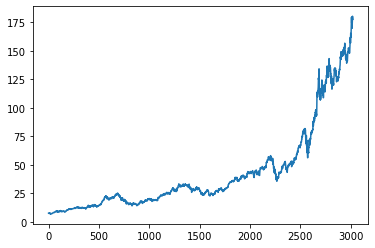

In [11]:
plt.plot(df.Close)

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

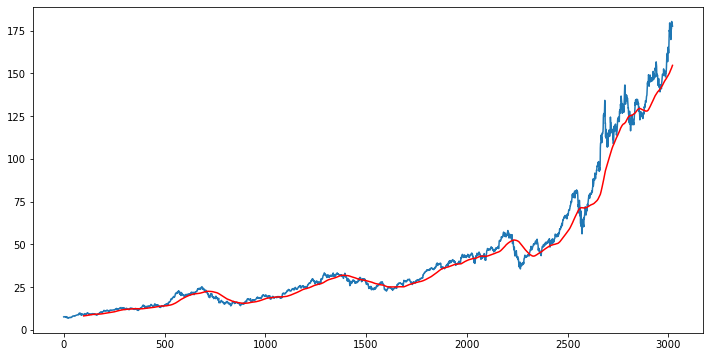

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

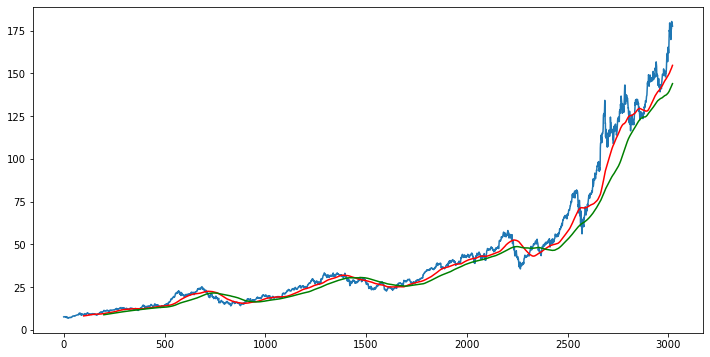

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
#splitting data into traing and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [17]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [18]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [21]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train,y_train =np.array(x_train), np.array(y_train)

In [22]:
model =Sequential()

model.add (LSTM(units = 50, activation ='relu',return_sequences = True,
input_shape = (x_train.shape[1], 1)))
model.add (Dropout(0.2))

model.add (LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add (Dropout(0.3))

model.add (LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add (Dropout(0.3))

model.add (LSTM(units = 120, activation = 'relu')) 
model.add (Dropout (0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           29040     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               8

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 19s 219ms/step - loss: 0.0388
Epoch 2/50
63/63 [==============================] - 14s 215ms/step - loss: 0.0085
Epoch 3/50
63/63 [==============================] - 14s 217ms/step - loss: 0.0068
Epoch 4/50
63/63 [==============================] - 14s 214ms/step - loss: 0.0057
Epoch 5/50
63/63 [==============================] - 15s 233ms/step - loss: 0.0055
Epoch 6/50
63/63 [==============================] - 14s 222ms/step - loss: 0.0060
Epoch 7/50
63/63 [==============================] - 14s 224ms/step - loss: 0.0058
Epoch 8/50
63/63 [==============================] - 14s 226ms/step - loss: 0.0049
Epoch 9/50
63/63 [==============================] - 14s 227ms/step - loss: 0.0048
Epoch 10/50
63/63 [==============================] - 14s 228ms/step - loss: 0.0047
Epoch 11/50
63/63 [==============================] - 14s 230ms/step - loss: 0.0044
Epoch 12/50
63/63 [==============================] - 14s 229ms/step - loss: 0.0048
Epoch 13/50
6

In [25]:
 model.save('keras_model.h5')

In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_testing,ignore_index = True)

In [28]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [30]:
input_data.shape

(1007, 1)

In [31]:
x_test=[]
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [33]:
# Making prediction

y_predicted = model.predict(x_test)

In [34]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [35]:
y_predicted

array([[0.12160452],
       [0.12236708],
       [0.12305954],
       [0.12367739],
       [0.12422636],
       [0.124724  ],
       [0.12519285],
       [0.12565553],
       [0.12612778],
       [0.12661235],
       [0.1271022 ],
       [0.12758982],
       [0.12806433],
       [0.12851313],
       [0.12892075],
       [0.12927197],
       [0.12954937],
       [0.1297398 ],
       [0.1298362 ],
       [0.12983567],
       [0.12973502],
       [0.12953852],
       [0.1292579 ],
       [0.1289115 ],
       [0.12852024],
       [0.1281093 ],
       [0.12769547],
       [0.12728989],
       [0.12691039],
       [0.12658185],
       [0.12632625],
       [0.12614934],
       [0.12605402],
       [0.12604399],
       [0.12611617],
       [0.12626381],
       [0.12647489],
       [0.1267378 ],
       [0.12704152],
       [0.12737432],
       [0.12772915],
       [0.12810656],
       [0.12850732],
       [0.12891978],
       [0.12932304],
       [0.12969789],
       [0.13006288],
       [0.130

In [36]:
scaler.scale_

array([0.00690691])

In [37]:
scale_factor = 1/0.00690691
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

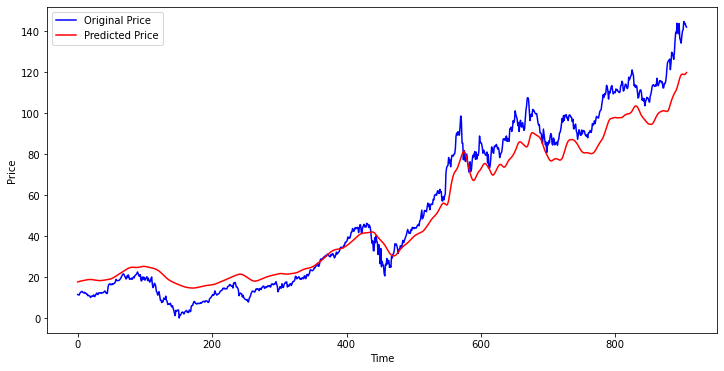

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()